In [1]:
import pandas as pd
import numpy as np
import pymysql
import getpass
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Files/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#This shows that we have 1460 rows and 81 columns in this dataset
df.shape

(1460, 81)

In [8]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

# Data cleaning and manipulation

* Checking for missing values and dealing with them accordingly.

In [9]:
# Making a copy of the dataframe before tampering with the dataframe.
df_copy = df.copy()

In [10]:
df_copy.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

I will looking into the columns that has more than 80% of missing values because they are not useful for this analysis as a result of too much of missing informations.

In [11]:
# Checking for missing values that is up to 80% and above in the dataframe.
missing_values_80 = df_copy[df_copy.columns[df_copy.isnull().mean() >= 0.8]]
missing_values_80

,Alley,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1455,NaN,NaN,NaN,NaN
1456,NaN,NaN,MnPrv,NaN
1457,NaN,NaN,GdPrv,Shed
1458,NaN,NaN,NaN,NaN


In [12]:
df_copy.drop(missing_values_80, axis = 1, inplace = True)

In [13]:
df_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
#checking the rest missing values and look for how to replace them
missing_values = df_copy.isnull().sum()
missing_values.loc[missing_values.gt(0)]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [15]:
# Accessing the columns with the most missing values and see how to fill them 
df_copy.loc[df_copy["FireplaceQu"].isnull(), ["Fireplaces",'YearBuilt', 'YearRemodAdd',
                                              'Heating','HeatingQC','Condition1',"Electrical"]].tail(20)

,Fireplaces,YearBuilt,YearRemodAdd,Heating,HeatingQC,Condition1,Electrical
1412,0,1949,1950,Wall,Fa,Norm,FuseF
1416,0,1885,1950,GasA,Gd,Norm,SBrkr
1418,0,1963,1963,GasA,TA,Norm,SBrkr
1422,0,2003,2003,GasA,Ex,Norm,SBrkr
1425,0,1959,1959,GasA,Ex,Norm,SBrkr
1431,0,1976,1976,GasA,TA,Norm,SBrkr
1432,0,1927,2007,GasA,TA,Norm,SBrkr
1436,0,1971,1971,GasA,TA,Norm,SBrkr
1438,0,1957,1996,GasA,TA,Artery,FuseA
1444,0,2004,2004,GasA,Ex,Norm,SBrkr


In [16]:
# Looking at the unique values of fireplaces.
df_copy.loc[df_copy["FireplaceQu"].isnull(), ["Fireplaces",'YearBuilt', 'YearRemodAdd',
                                              'Heating','HeatingQC','Condition1',"Electrical"]].Fireplaces.value_counts()

0    690
Name: Fireplaces, dtype: int64

It can be seen that where there is a missing value in Fireplace Quality column then the number of fireplaces available in that house is zero (0), which means they don't have fireplace at all. Hence, I will be filling the missing values with `None`

In [17]:
df_copy["FireplaceQu"].fillna("None", inplace = True)
df_copy["FireplaceQu"].isnull().sum()

0

Filling the missing values in Electrical columns

In [18]:
df_copy.loc[df_copy["Electrical"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


In [19]:
df_copy.loc[df_copy["YearBuilt"]== 2006, ["SalePrice","YearBuilt","Electrical",
                                          "Heating","HeatingQC","SaleCondition"]]

,SalePrice,YearBuilt,Electrical,Heating,HeatingQC,SaleCondition
13,279500,2006,SBrkr,GasA,Ex,Partial
47,249700,2006,SBrkr,GasA,Ex,Normal
58,438780,2006,SBrkr,GasA,Ex,Partial
62,202500,2006,SBrkr,GasA,Ex,Normal
117,155000,2006,SBrkr,GasA,Gd,Partial
...,...,...,...,...,...,...
1379,167500,2006,NaN,GasA,Gd,Normal
1388,377500,2006,SBrkr,GasA,Ex,Normal
1394,246578,2006,SBrkr,GasA,Ex,Partial
1402,193879,2006,SBrkr,GasA,Ex,Partial


In [20]:
df_copy["Electrical"].value_counts(normalize=True,dropna = False)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
NaN      0.000685
Name: Electrical, dtype: float64

Since the missing number here is just one and the most occuring values in this column is `SBrKr`. So i will be filling the missing value with the value of the most occuring in the column.

In [21]:
df_copy["Electrical"].fillna("SBrKr",inplace = True)

In [22]:
df_copy[["Electrical"]].isna().sum()

Electrical    0
dtype: int64

In [23]:
df_copy["FireplaceQu"].value_counts(normalize=True, dropna = False)

None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: FireplaceQu, dtype: float64

Checking for the missing values in Lotfrontage columns and decide what to do with them

In [24]:
# Investigating the column by comparing it with other relevants columns.
df_copy.loc[df_copy["LotFrontage"].isna(), ["LotArea","LotShape","Street"]]

,LotArea,LotShape,Street
7,10382,IR1,Pave
12,12968,IR2,Pave
14,10920,IR1,Pave
16,11241,IR1,Pave
24,8246,IR1,Pave
...,...,...,...
1429,12546,IR1,Pave
1431,4928,IR1,Pave
1441,4426,Reg,Pave
1443,8854,Reg,Pave


In [25]:
# I will fill the rest missing values with the mean value of the column values 
df_copy["LotFrontage"].mean()

70.04995836802665

In [26]:
df_copy["LotFrontage"].fillna(70.1, inplace = True)

In [27]:
df_copy["LotFrontage"].isna().sum()

0

In [28]:
df_copy.isna().sum().sort_values(ascending = False).head(15)

GarageCond      81
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
OverallCond      0
Exterior2nd      0
ExterQual        0
dtype: int64

In [29]:
categorical_columns_na = df_copy.select_dtypes(include=['object']).isna().sum()
numerical_columns_na = df_copy.select_dtypes(exclude=['object']).isna().sum()
numerical_columns = df_copy.select_dtypes(exclude=['object'])
categorical_columns = df_copy.select_dtypes(include=['object'])

Fill the categorial columns with missing values with `None` and fill that of numerical columns with `0.0`

In [30]:
df_copy.fillna({"GarageCond": "None","GarageQual": "None",
               "GarageType": "None","GarageFinish": "None",
               "BsmtFinType2": "None","BsmtFinType1": "None",
               "BsmtExposure": "None","BsmtCond": "None",
               "BsmtQual": "None","MasVnrType": "None", 
               "GarageYrBlt": 0.0, "MasVnrArea": 0.0}, inplace = True)

In [31]:
df_copy.isna().sum().sort_values(ascending = False)

SalePrice       0
ExterCond       0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Id              0
Length: 77, dtype: int64

## Looking for the columns with the most relevant correlations with sales price of over 0.5 correlation.

In [32]:
df_copy.corr().reset_index().loc[df_copy.corr().reset_index().SalePrice > 0.5,
                                 ["index","SalePrice"]].rename(columns = {"index": "Feature"})

,Feature,SalePrice
4,OverallQual,0.790982
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852
16,GrLivArea,0.708624
19,FullBath,0.560664
23,TotRmsAbvGrd,0.533723
26,GarageCars,0.640409
27,GarageArea,0.623431


In [33]:
relevant_feature = df_copy[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF"
                           ,"GrLivArea","FullBath","TotRmsAbvGrd"
                           ,"GarageArea","SalePrice"]]

We are able to retrieve 10 columns with over 0.5 correlation with the sales price excluding the salesprice row. Hence we will plot a scatterplot to show the correlations respectively

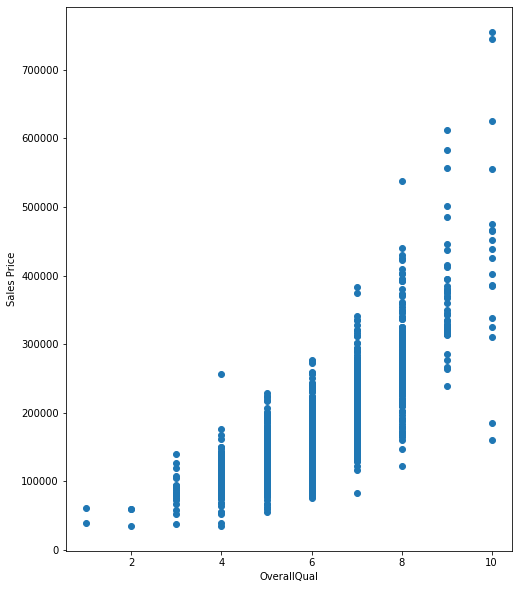

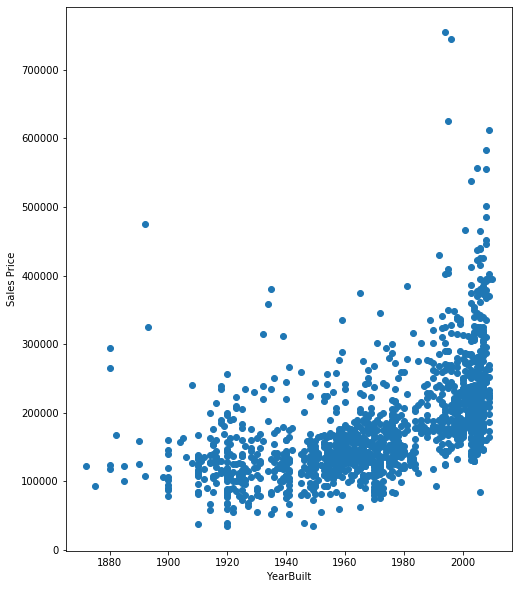

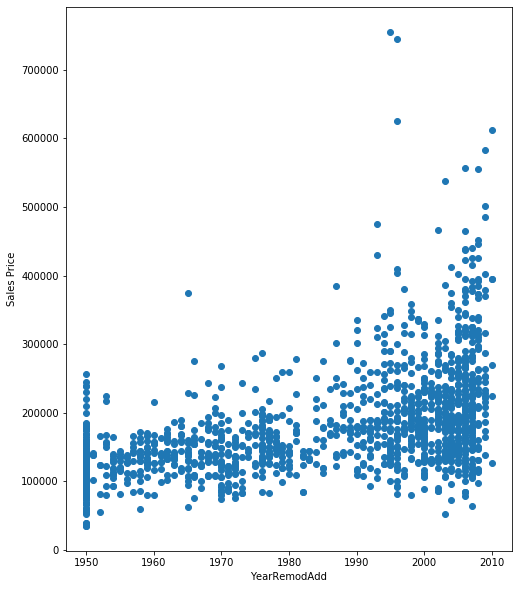

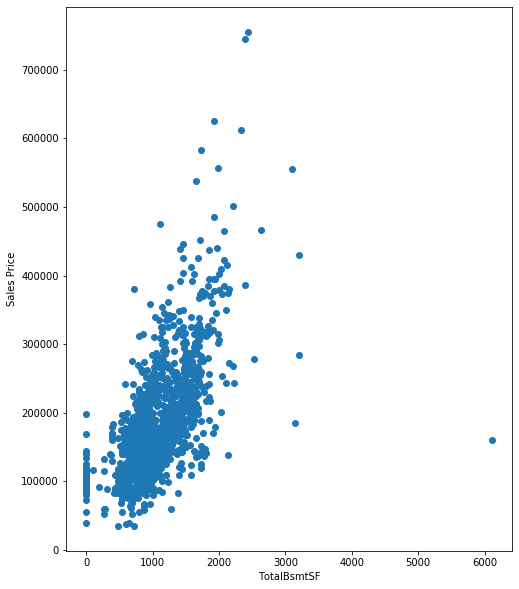

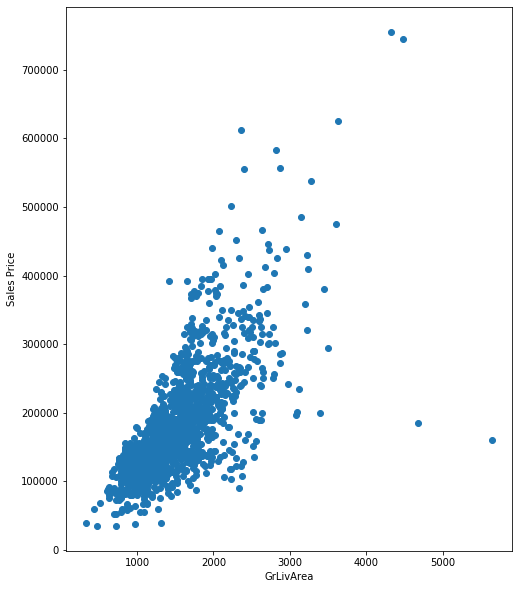

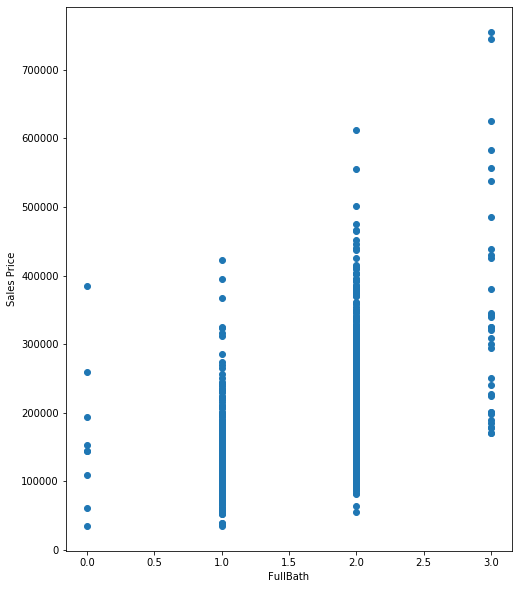

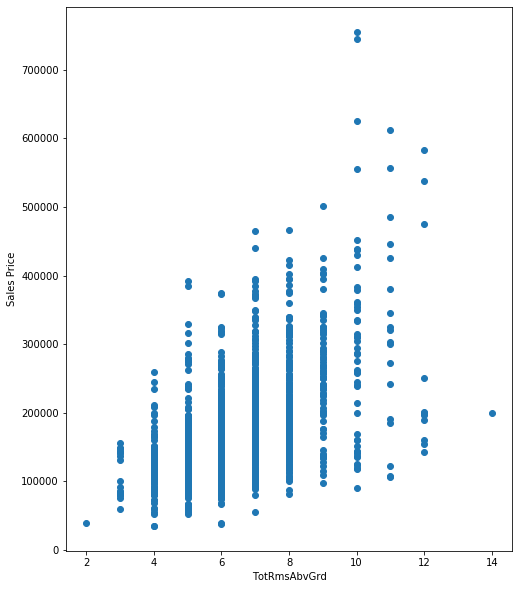

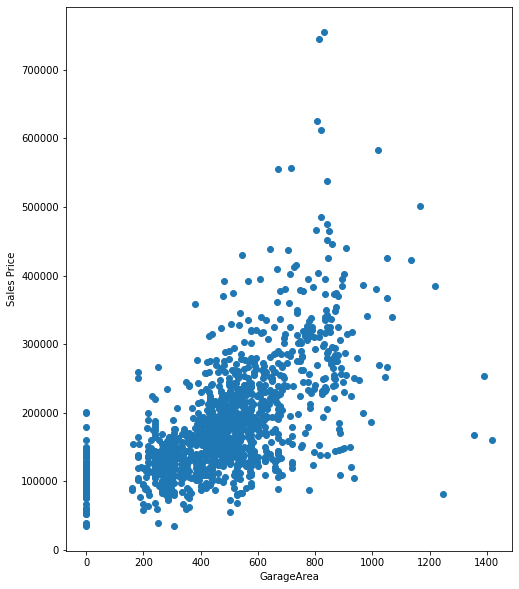

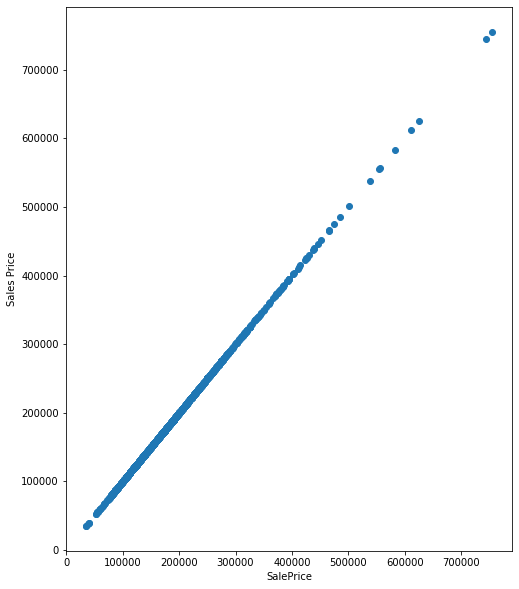

In [34]:
target_column = relevant_feature["SalePrice"]
for i in relevant_feature:
    plt.figure(figsize=(8,10))
    plt.scatter(relevant_feature[i], target_column)
    plt.xlabel(i)
    plt.ylabel("Sales Price")
    plt.show()

#### Summary of the plot above
The following can be noticed from the plots above:

* OverallQual is increasing with sales price and this shows us that the more the overall quality of a house the more expensive the house is going to be. This shows a positive relationship with sales price
* It can be seen that the Year a house is built too has a positive impact on the sales price of the house because houses built in the 1880's are definately cheaper than those built in 2000's.
* Also the year a house is rebuilt or rennovated increases positively with sales prices too.
* Total square feet of basement area increases with sales prices
* First Floor square feet also increases with sales prices
* Ground living area square feet increases with Sales price because the larger the `GrlivArea` then the more expensive the house would be.
* Full bathrooms in a house determines the price in which the house will be sold according to the plot
* Total rooms above grade (does not include bathrooms) also contribute to increase in sales price
* Size of garage in car capacity contributes to the sales price of a house according to this plot.
* Size of garage in square feet also increases with price.

##### Removing the outliers so that our data can be ready for regression.
* For this analysis, I will removing the outliers majorly in the relevant_features because that is the only we will be concentrating on for this analysis

In [35]:
relevant_feature.loc[relevant_feature["TotalBsmtSF"] > 4000]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
1298,10,2008,2008,6110,5642,2,12,1418,160000


In [36]:
relevant_feature.loc[relevant_feature["GrLivArea"] > 4000]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
523,10,2007,2008,3138,4676,3,11,884,184750
691,10,1994,1995,2444,4316,3,10,832,755000
1182,10,1996,1996,2396,4476,3,10,813,745000
1298,10,2008,2008,6110,5642,2,12,1418,160000


In [37]:
relevant_feature.loc[relevant_feature["TotalBsmtSF"] > 6000]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
1298,10,2008,2008,6110,5642,2,12,1418,160000


In [38]:
relevant_feature.loc[relevant_feature["SalePrice"] > 700000]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
691,10,1994,1995,2444,4316,3,10,832,755000
1182,10,1996,1996,2396,4476,3,10,813,745000


In [39]:
relevant_feature.loc[relevant_feature["TotRmsAbvGrd"] > 13.5]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
635,6,1914,1995,1440,3395,2,14,0,200000


I will be dropping all these rows with outliers and proceed to regression.

In [40]:
relevant_feature = relevant_feature.drop(index = [1182,691,1298,1182,691,635,523])

In [41]:
relevant_feature.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
0,7,2003,2003,856,1710,2,8,548,208500
1,6,1976,1976,1262,1262,2,6,460,181500
2,7,2001,2002,920,1786,2,6,608,223500
3,7,1915,1970,756,1717,1,7,642,140000
4,8,2000,2000,1145,2198,2,9,836,250000


Cross-checking the columns after outliers removal

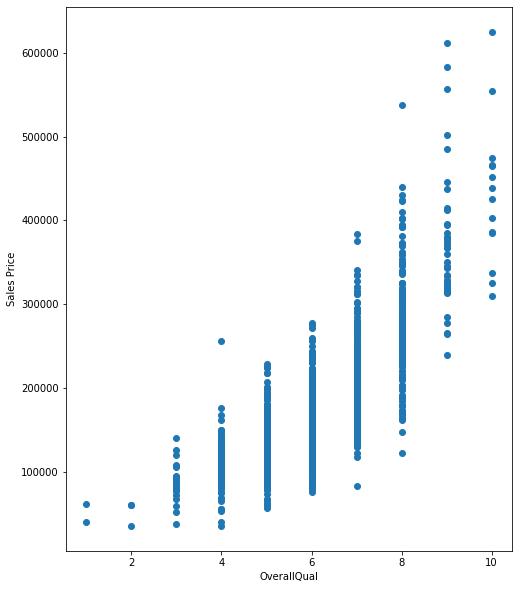

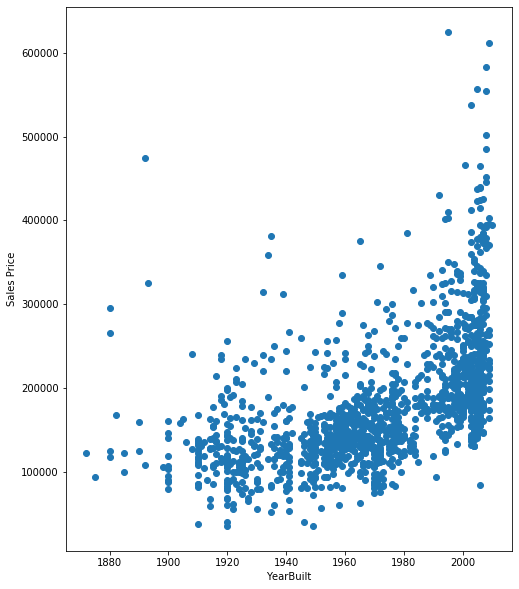

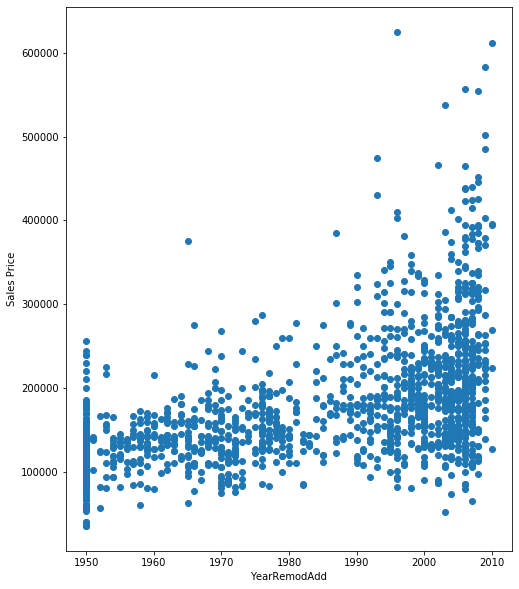

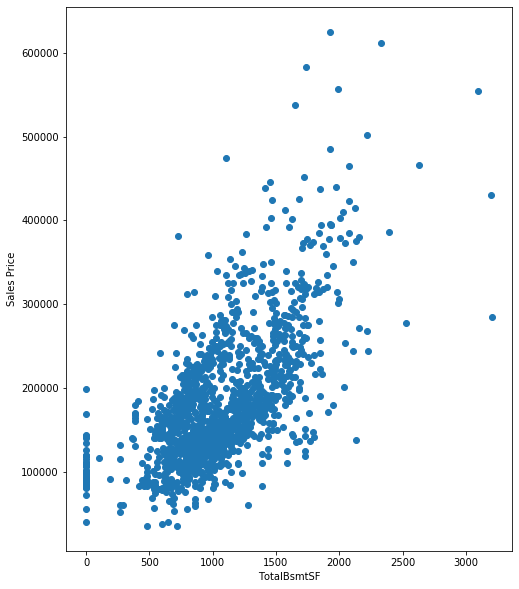

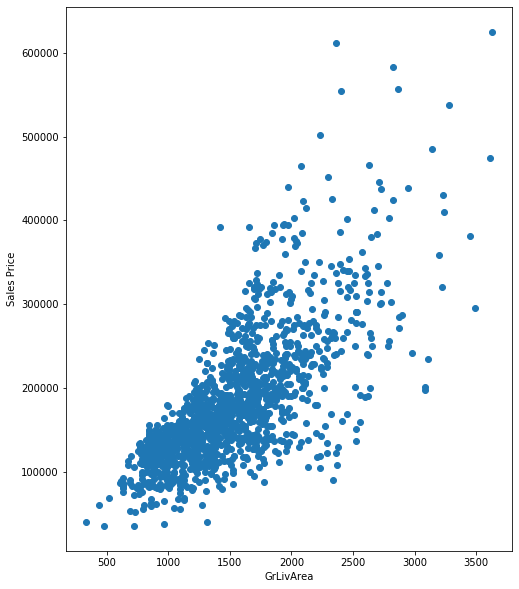

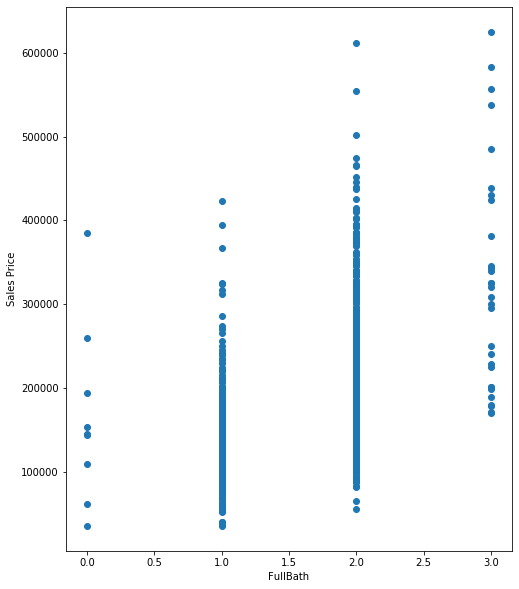

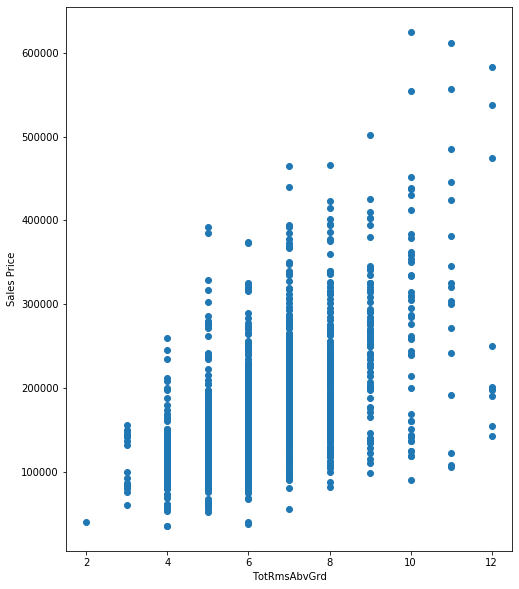

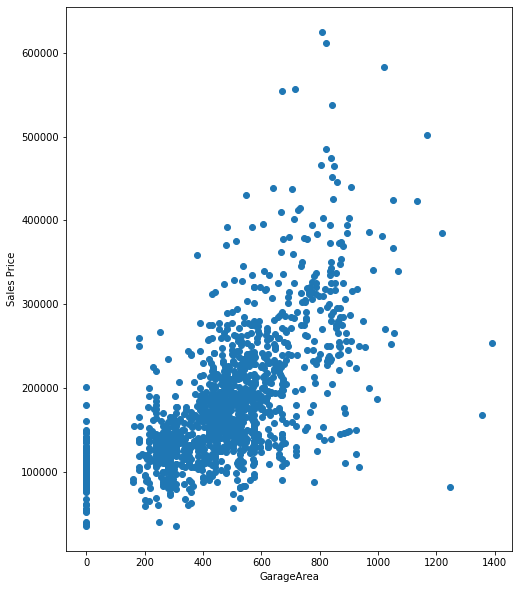

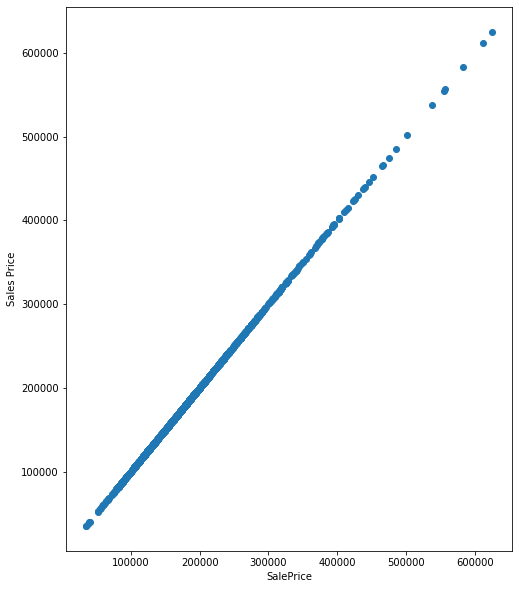

In [42]:
target_column = relevant_feature["SalePrice"]
for i in relevant_feature:
    plt.figure(figsize=(8,10))
    plt.scatter(relevant_feature[i], target_column)
    plt.xlabel(i)
    plt.ylabel("Sales Price")
    plt.show()

### Regression modelling

In [43]:
relevant_feature = sm.add_constant(relevant_feature)
relevant_feature

,const,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
0,1.0,7,2003,2003,856,1710,2,8,548,208500
1,1.0,6,1976,1976,1262,1262,2,6,460,181500
2,1.0,7,2001,2002,920,1786,2,6,608,223500
3,1.0,7,1915,1970,756,1717,1,7,642,140000
4,1.0,8,2000,2000,1145,2198,2,9,836,250000
...,...,...,...,...,...,...,...,...,...,...
1455,1.0,6,1999,2000,953,1647,2,7,460,175000
1456,1.0,6,1978,1988,1542,2073,2,7,500,210000
1457,1.0,7,1941,2006,1152,2340,2,9,252,266500
1458,1.0,5,1950,1996,1078,1078,1,5,240,142125


In [44]:
Y = relevant_feature["SalePrice"]
X = relevant_feature[["const", "GrLivArea", "TotalBsmtSF", 'OverallQual', 
                    "GarageArea", "TotalBsmtSF","YearBuilt",
                      "YearRemodAdd","FullBath"]]
lin_reg = sm.OLS(Y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     949.7
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:53:54   Log-Likelihood:                -17177.
No. Observations:                1455   AIC:                         3.437e+04
Df Residuals:                    1447   BIC:                         3.441e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.326e+06   1.09e+05    -12.157      0.000   -1.54e+06   -1.11e+06
GrLivArea       62.1038      2.693     23.061      0.000      56.821      67.387
TotalBsmtSF     20.3472      1.281     15.890      0.000      17.835      22.859
OverallQual   1.717e+04   1014.085     16.936      0.000    1.52e+04    1.92e+04
GarageArea      43.2491      5.273      8.201      0.000      32.905      53.593
TotalBsmtSF     20.3472      1.281     15.890      0.000      17.835      22.859
YearBuilt      300.0102     42.505      7.058      0.000     216.632     383.389
YearRemodAdd   337.6263     54.632      6.180      0.000     230.459     444.793
FullBath     -1.058e+04   2287.765     -4.624      0.000   -1.51e+04   -6091.167
==============================================================================
Omnibus:                      448.790   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3499.140
Skew:                           1.216   Prob(JB):                         0.00
Kurtosis:                      10.197   Cond. No.                     2.60e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Conclusion
* From the regression model, We can see that the R-square is `0.821` and the Adjusted R-square is `0.820` which shows that our regression model is fit enough and ofcourse strong.
* Also the P-value of all the variables used in the model are statistically significant which are all lesser than 5%
* The coefficient of the variables used are mostly positive except for `FullBath` which has a negative impact on our target variable.